#### After hydrating the tweets using the hydrator tool, we have .csv files in the path Tweets/

In [1]:
import warnings
warnings.filterwarnings("ignore")

#### Concatenating all the csv files to one file Tweets_omicron

In [2]:
import glob
import pandas as pd

# Set input and output file names and paths
input_path = "Tweets/"
output_file = "Tweets_omicron.csv"

# Use glob to get a list of all CSV files in the input path
all_files = glob.glob(input_path + "*.csv")

# Read all CSV files into a list of dataframes
dfs = [pd.read_csv(file) for file in all_files]

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Write the combined dataframe to a CSV file
combined_df.to_csv(output_file, index=False)


#### Load the data to dataframe

In [3]:
import pandas as pd

# Load the tweets data from a CSV file
tweets_df = pd.read_csv("Tweets_omicron.csv")


In [4]:
tweets_df.shape

(480244, 35)

In [5]:
tweets_df.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_id', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

#### Text preprocessing

In [6]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return " ".join(lemmas)

# Apply clean_text to the dataframe
tweets_df["text_processed"] = tweets_df["text"].apply(clean_text)


In [7]:
tweets_text = tweets_df[['text_processed', 'text', 'id']] #new dataframe with required columns

In [8]:
tweets_text.head(30)

,text_processed,text,id
0,calm half world population covid dont even kno...,"@NoahHammer8 Calm down, half of the world's po...",1510034073930334208
1,booster dose covid vaccine needed fight omicro...,Booster Dose Of Covid Vaccine Needed To Fight ...,1510034152925577222
2,zoe ons wonder there omicron xe variant detect...,@bitsofplastic @Eyeswideopen69 Zoe and ONS are...,1510038047185903620
3,improves safety vaccinated ventilating facilit...,@lxexmxc @NYCMayor What improves safety is bei...,1510043377844334592
4,course however seems omicron doesnt kill much ...,"@Nik0Mi @boulware_dr Of course.\nHowever, it s...",1510043498002665478
5,lt5omicroncovid19delta68 incidence outcome sar...,米国&lt;5歳小児OmicronのCOVID-19発症率はDeltaの6〜8倍であったが、...,1510043938828488706
6,ralph baric unc design omicron igor chudov unc...,Did Ralph Baric of UNC Design Omicron? - by Ig...,1510044194542440452
7,offuckingcourse new mutant xe omicron variant ...,But of-fucking-course it is. 👇👇🤨\n\nNew Mutant...,1510040674053222403
8,comme omicron va passer au travers cette gripe...,"@Roxane_ Comme Omicron, on va passer au traver...",1510042945885511680
9,happens people get omicron even wearing mask g...,@jmq329 It happens. People get omicron even we...,1510040018231955461


#### Sentiment classification as positive, negative or neutral

In [9]:
!pip install TextBlob

from textblob import TextBlob

# Define a function for getting the sentiment of a text using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

# Get the sentiment of the tweets
tweets_text["sentiment"] = tweets_text["text"].apply(get_sentiment)


In [10]:
tweets_text.head(30)

,text_processed,text,id,sentiment
0,calm half world population covid dont even kno...,"@NoahHammer8 Calm down, half of the world's po...",1510034073930334208,positive
1,booster dose covid vaccine needed fight omicro...,Booster Dose Of Covid Vaccine Needed To Fight ...,1510034152925577222,neutral
2,zoe ons wonder there omicron xe variant detect...,@bitsofplastic @Eyeswideopen69 Zoe and ONS are...,1510038047185903620,negative
3,improves safety vaccinated ventilating facilit...,@lxexmxc @NYCMayor What improves safety is bei...,1510043377844334592,positive
4,course however seems omicron doesnt kill much ...,"@Nik0Mi @boulware_dr Of course.\nHowever, it s...",1510043498002665478,positive
5,lt5omicroncovid19delta68 incidence outcome sar...,米国&lt;5歳小児OmicronのCOVID-19発症率はDeltaの6〜8倍であったが、...,1510043938828488706,neutral
6,ralph baric unc design omicron igor chudov unc...,Did Ralph Baric of UNC Design Omicron? - by Ig...,1510044194542440452,neutral
7,offuckingcourse new mutant xe omicron variant ...,But of-fucking-course it is. 👇👇🤨\n\nNew Mutant...,1510040674053222403,positive
8,comme omicron va passer au travers cette gripe...,"@Roxane_ Comme Omicron, on va passer au traver...",1510042945885511680,neutral
9,happens people get omicron even wearing mask g...,@jmq329 It happens. People get omicron even we...,1510040018231955461,negative


#### Visualising using a pie graph the percentage of the sentiment of the Omicron tweets

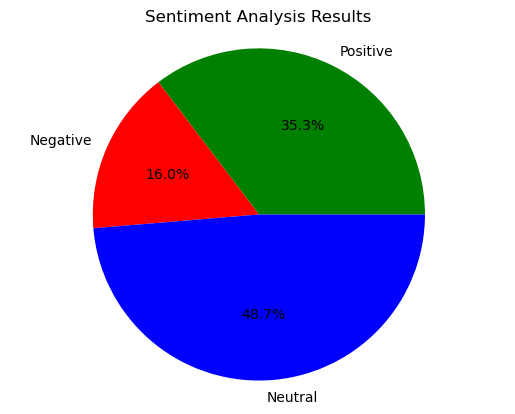

In [11]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral tweets
positive_tweets = tweets_text[tweets_text["sentiment"] == "positive"].shape[0]
negative_tweets = tweets_text[tweets_text["sentiment"] == "negative"].shape[0]
neutral_tweets = tweets_text[tweets_text["sentiment"] == "neutral"].shape[0]

# Create a pie chart
labels = ["Positive", "Negative", "Neutral"]
sizes = [positive_tweets, negative_tweets, neutral_tweets]
colors = ["green", "red", "blue"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Sentiment Analysis Results")

# Show the pie chart
plt.show()
